In [1]:
#add ../src to the path
import sys, os
sys.path.append('../src')
from LS_GAN import Generator, Discriminator

In [2]:
#necessary imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [3]:
#load the dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='../data', train=True, download=True, transform=transform)

#load the dataloader
batch_size = 64
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, drop_last=True)

In [4]:
#check image shape
for images, labels in trainloader:
    print(images.shape)
    break

torch.Size([64, 1, 28, 28])


In [5]:
#load the generator and discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

noise_dim = 100
image_dim = 28*28
num_classes = 10

gen = Generator(noise_dim=noise_dim, image_dim=image_dim, num_classes=num_classes).to(device)
disc = Discriminator(image_dim=image_dim, num_classes=num_classes).to(device)

In [6]:
#feed samples to the generator and discriminator and check if everything is working
noise = torch.randn(batch_size, noise_dim, device=device)
labels = torch.randint(0, num_classes, (batch_size,), device=device)
gen_imgs = gen(noise, labels)
print("Generated images shape: ", gen_imgs.shape)

disc_out = disc(gen_imgs, labels)
print("Discriminator output shape: ", disc_out.shape)

Generated images shape:  torch.Size([64, 784])
Discriminator output shape:  torch.Size([64, 1])


In [7]:
# For ls_gan, we use mean squared error loss instead of binary cross entropy loss
# Loss function and optimizer
criterion = nn.MSELoss()
lr = 0.0002

# Optimizers
beta1 = 0.5
beta2 = 0.999
optimizer_G = torch.optim.Adam(gen.parameters(), lr=lr, betas=(beta1, beta2))
optimizer_D = torch.optim.Adam(disc.parameters(), lr=lr, betas=(beta1, beta2))

Epoch [0/100] Batch 0/937                     Loss D: 0.2096, loss G: 0.3658
Epoch [0/100] Batch 200/937                     Loss D: 0.1826, loss G: 0.3888
Epoch [0/100] Batch 400/937                     Loss D: 0.2185, loss G: 0.2768
Epoch [0/100] Batch 600/937                     Loss D: 0.2151, loss G: 0.2463
Epoch [0/100] Batch 800/937                     Loss D: 0.2131, loss G: 0.2562


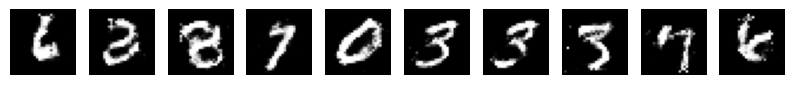

Epoch [1/100] Batch 0/937                     Loss D: 0.1931, loss G: 0.3403
Epoch [1/100] Batch 200/937                     Loss D: 0.2032, loss G: 0.3674
Epoch [1/100] Batch 400/937                     Loss D: 0.2031, loss G: 0.5870
Epoch [1/100] Batch 600/937                     Loss D: 0.1887, loss G: 0.2866
Epoch [1/100] Batch 800/937                     Loss D: 0.1876, loss G: 0.3015
Epoch [2/100] Batch 0/937                     Loss D: 0.2129, loss G: 0.4057
Epoch [2/100] Batch 200/937                     Loss D: 0.1844, loss G: 0.2876
Epoch [2/100] Batch 400/937                     Loss D: 0.1983, loss G: 0.3481
Epoch [2/100] Batch 600/937                     Loss D: 0.1730, loss G: 0.4438
Epoch [2/100] Batch 800/937                     Loss D: 0.1969, loss G: 0.3231
Epoch [3/100] Batch 0/937                     Loss D: 0.1990, loss G: 0.3990
Epoch [3/100] Batch 200/937                     Loss D: 0.1891, loss G: 0.4382
Epoch [3/100] Batch 400/937                     Loss D: 0.

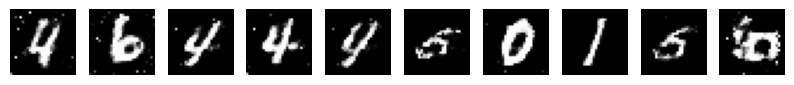

Epoch [6/100] Batch 0/937                     Loss D: 0.1800, loss G: 0.3693
Epoch [6/100] Batch 200/937                     Loss D: 0.1762, loss G: 0.2732
Epoch [6/100] Batch 400/937                     Loss D: 0.2093, loss G: 0.2027
Epoch [6/100] Batch 600/937                     Loss D: 0.2206, loss G: 0.5301
Epoch [6/100] Batch 800/937                     Loss D: 0.1846, loss G: 0.4820
Epoch [7/100] Batch 0/937                     Loss D: 0.2181, loss G: 0.2793
Epoch [7/100] Batch 200/937                     Loss D: 0.1832, loss G: 0.4036
Epoch [7/100] Batch 400/937                     Loss D: 0.1830, loss G: 0.3147
Epoch [7/100] Batch 600/937                     Loss D: 0.1661, loss G: 0.4636
Epoch [7/100] Batch 800/937                     Loss D: 0.1895, loss G: 0.3387
Epoch [8/100] Batch 0/937                     Loss D: 0.2135, loss G: 0.2557
Epoch [8/100] Batch 200/937                     Loss D: 0.1710, loss G: 0.4813
Epoch [8/100] Batch 400/937                     Loss D: 0.

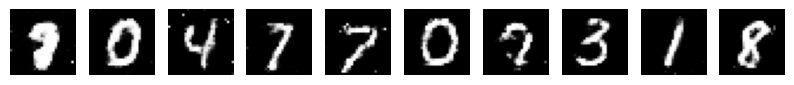

Epoch [11/100] Batch 0/937                     Loss D: 0.1933, loss G: 0.4616
Epoch [11/100] Batch 200/937                     Loss D: 0.2165, loss G: 0.4391
Epoch [11/100] Batch 400/937                     Loss D: 0.2050, loss G: 0.2777
Epoch [11/100] Batch 600/937                     Loss D: 0.2132, loss G: 0.2408
Epoch [11/100] Batch 800/937                     Loss D: 0.2367, loss G: 0.1830
Epoch [12/100] Batch 0/937                     Loss D: 0.1967, loss G: 0.3265
Epoch [12/100] Batch 200/937                     Loss D: 0.1902, loss G: 0.2656
Epoch [12/100] Batch 400/937                     Loss D: 0.1738, loss G: 0.5341
Epoch [12/100] Batch 600/937                     Loss D: 0.1703, loss G: 0.3632
Epoch [12/100] Batch 800/937                     Loss D: 0.1987, loss G: 0.3667
Epoch [13/100] Batch 0/937                     Loss D: 0.2158, loss G: 0.4366
Epoch [13/100] Batch 200/937                     Loss D: 0.2185, loss G: 0.4095
Epoch [13/100] Batch 400/937                  

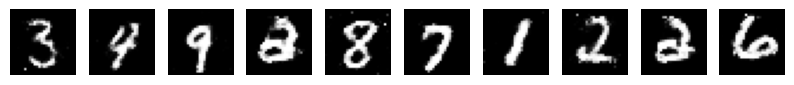

Epoch [16/100] Batch 0/937                     Loss D: 0.1737, loss G: 0.3520
Epoch [16/100] Batch 200/937                     Loss D: 0.1940, loss G: 0.3485
Epoch [16/100] Batch 400/937                     Loss D: 0.1851, loss G: 0.4458
Epoch [16/100] Batch 600/937                     Loss D: 0.1868, loss G: 0.5168
Epoch [16/100] Batch 800/937                     Loss D: 0.1826, loss G: 0.5163
Epoch [17/100] Batch 0/937                     Loss D: 0.2112, loss G: 0.5017
Epoch [17/100] Batch 200/937                     Loss D: 0.1735, loss G: 0.4462
Epoch [17/100] Batch 400/937                     Loss D: 0.2083, loss G: 0.5218
Epoch [17/100] Batch 600/937                     Loss D: 0.1973, loss G: 0.5164
Epoch [17/100] Batch 800/937                     Loss D: 0.2130, loss G: 0.3227
Epoch [18/100] Batch 0/937                     Loss D: 0.1845, loss G: 0.3527
Epoch [18/100] Batch 200/937                     Loss D: 0.1742, loss G: 0.3499
Epoch [18/100] Batch 400/937                  

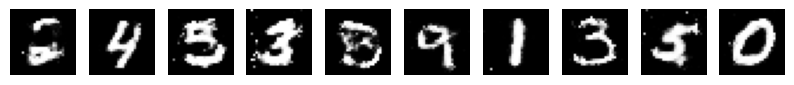

Epoch [21/100] Batch 0/937                     Loss D: 0.1981, loss G: 0.5136
Epoch [21/100] Batch 200/937                     Loss D: 0.2421, loss G: 0.1964
Epoch [21/100] Batch 400/937                     Loss D: 0.2194, loss G: 0.6804
Epoch [21/100] Batch 600/937                     Loss D: 0.2174, loss G: 0.4977
Epoch [21/100] Batch 800/937                     Loss D: 0.1946, loss G: 0.4003
Epoch [22/100] Batch 0/937                     Loss D: 0.1716, loss G: 0.5902
Epoch [22/100] Batch 200/937                     Loss D: 0.1891, loss G: 0.3995
Epoch [22/100] Batch 400/937                     Loss D: 0.1890, loss G: 0.5548
Epoch [22/100] Batch 600/937                     Loss D: 0.1832, loss G: 0.3591
Epoch [22/100] Batch 800/937                     Loss D: 0.2219, loss G: 0.4752
Epoch [23/100] Batch 0/937                     Loss D: 0.1827, loss G: 0.4763
Epoch [23/100] Batch 200/937                     Loss D: 0.1928, loss G: 0.5228
Epoch [23/100] Batch 400/937                  

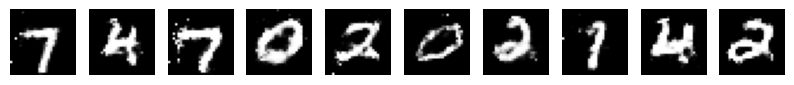

Epoch [26/100] Batch 0/937                     Loss D: 0.1837, loss G: 0.4098
Epoch [26/100] Batch 200/937                     Loss D: 0.1804, loss G: 0.4150
Epoch [26/100] Batch 400/937                     Loss D: 0.2095, loss G: 0.5981
Epoch [26/100] Batch 600/937                     Loss D: 0.2265, loss G: 0.5676
Epoch [26/100] Batch 800/937                     Loss D: 0.2255, loss G: 0.2217
Epoch [27/100] Batch 0/937                     Loss D: 0.1852, loss G: 0.5277
Epoch [27/100] Batch 200/937                     Loss D: 0.1941, loss G: 0.2635
Epoch [27/100] Batch 400/937                     Loss D: 0.1859, loss G: 0.4685
Epoch [27/100] Batch 600/937                     Loss D: 0.2113, loss G: 0.3182
Epoch [27/100] Batch 800/937                     Loss D: 0.2270, loss G: 0.3359
Epoch [28/100] Batch 0/937                     Loss D: 0.1891, loss G: 0.4210
Epoch [28/100] Batch 200/937                     Loss D: 0.1908, loss G: 0.5667
Epoch [28/100] Batch 400/937                  

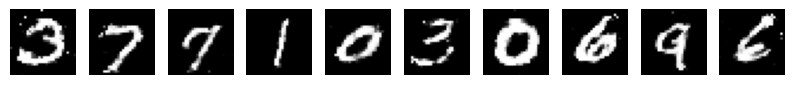

Epoch [31/100] Batch 0/937                     Loss D: 0.1712, loss G: 0.3233
Epoch [31/100] Batch 200/937                     Loss D: 0.1760, loss G: 0.3287
Epoch [31/100] Batch 400/937                     Loss D: 0.1975, loss G: 0.5437
Epoch [31/100] Batch 600/937                     Loss D: 0.1774, loss G: 0.4646
Epoch [31/100] Batch 800/937                     Loss D: 0.1734, loss G: 0.5612
Epoch [32/100] Batch 0/937                     Loss D: 0.1725, loss G: 0.3982
Epoch [32/100] Batch 200/937                     Loss D: 0.2055, loss G: 0.5549
Epoch [32/100] Batch 400/937                     Loss D: 0.1883, loss G: 0.6343
Epoch [32/100] Batch 600/937                     Loss D: 0.1977, loss G: 0.3485
Epoch [32/100] Batch 800/937                     Loss D: 0.2372, loss G: 0.4118
Epoch [33/100] Batch 0/937                     Loss D: 0.2013, loss G: 0.5207
Epoch [33/100] Batch 200/937                     Loss D: 0.1938, loss G: 0.5216
Epoch [33/100] Batch 400/937                  

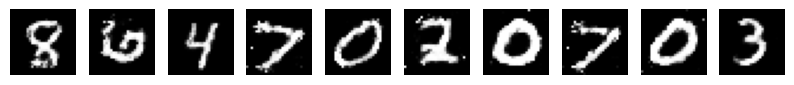

Epoch [36/100] Batch 0/937                     Loss D: 0.1805, loss G: 0.4567
Epoch [36/100] Batch 200/937                     Loss D: 0.1754, loss G: 0.3399
Epoch [36/100] Batch 400/937                     Loss D: 0.1681, loss G: 0.4028
Epoch [36/100] Batch 600/937                     Loss D: 0.1920, loss G: 0.2940
Epoch [36/100] Batch 800/937                     Loss D: 0.1973, loss G: 0.3099
Epoch [37/100] Batch 0/937                     Loss D: 0.2079, loss G: 0.3476
Epoch [37/100] Batch 200/937                     Loss D: 0.2000, loss G: 0.4839
Epoch [37/100] Batch 400/937                     Loss D: 0.1948, loss G: 0.5035
Epoch [37/100] Batch 600/937                     Loss D: 0.1838, loss G: 0.4503
Epoch [37/100] Batch 800/937                     Loss D: 0.1912, loss G: 0.4171
Epoch [38/100] Batch 0/937                     Loss D: 0.2086, loss G: 0.2560
Epoch [38/100] Batch 200/937                     Loss D: 0.2034, loss G: 0.4241
Epoch [38/100] Batch 400/937                  

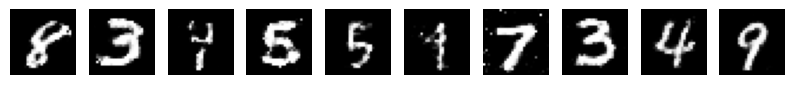

Epoch [41/100] Batch 0/937                     Loss D: 0.1896, loss G: 0.6825
Epoch [41/100] Batch 200/937                     Loss D: 0.1666, loss G: 0.5908
Epoch [41/100] Batch 400/937                     Loss D: 0.1851, loss G: 0.5462
Epoch [41/100] Batch 600/937                     Loss D: 0.2113, loss G: 0.4866
Epoch [41/100] Batch 800/937                     Loss D: 0.2017, loss G: 0.2745
Epoch [42/100] Batch 0/937                     Loss D: 0.1885, loss G: 0.5671
Epoch [42/100] Batch 200/937                     Loss D: 0.1756, loss G: 0.4274
Epoch [42/100] Batch 400/937                     Loss D: 0.1696, loss G: 0.5060
Epoch [42/100] Batch 600/937                     Loss D: 0.2274, loss G: 0.2030
Epoch [42/100] Batch 800/937                     Loss D: 0.1935, loss G: 0.5312
Epoch [43/100] Batch 0/937                     Loss D: 0.1820, loss G: 0.4458
Epoch [43/100] Batch 200/937                     Loss D: 0.1911, loss G: 0.4637
Epoch [43/100] Batch 400/937                  

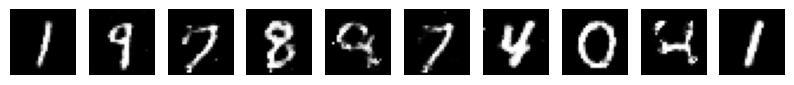

Epoch [46/100] Batch 0/937                     Loss D: 0.1758, loss G: 0.4411
Epoch [46/100] Batch 200/937                     Loss D: 0.1961, loss G: 0.5410
Epoch [46/100] Batch 400/937                     Loss D: 0.2208, loss G: 0.4393
Epoch [46/100] Batch 600/937                     Loss D: 0.1900, loss G: 0.4171
Epoch [46/100] Batch 800/937                     Loss D: 0.1951, loss G: 0.3583
Epoch [47/100] Batch 0/937                     Loss D: 0.1699, loss G: 0.3394
Epoch [47/100] Batch 200/937                     Loss D: 0.2406, loss G: 0.6139
Epoch [47/100] Batch 400/937                     Loss D: 0.1810, loss G: 0.5718
Epoch [47/100] Batch 600/937                     Loss D: 0.2067, loss G: 0.3636
Epoch [47/100] Batch 800/937                     Loss D: 0.1947, loss G: 0.3968
Epoch [48/100] Batch 0/937                     Loss D: 0.1617, loss G: 0.3858
Epoch [48/100] Batch 200/937                     Loss D: 0.2320, loss G: 0.6225
Epoch [48/100] Batch 400/937                  

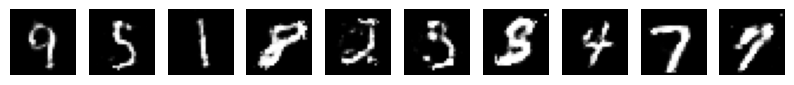

Epoch [51/100] Batch 0/937                     Loss D: 0.1940, loss G: 0.3603
Epoch [51/100] Batch 200/937                     Loss D: 0.1839, loss G: 0.5470
Epoch [51/100] Batch 400/937                     Loss D: 0.1987, loss G: 0.4651
Epoch [51/100] Batch 600/937                     Loss D: 0.1679, loss G: 0.4930
Epoch [51/100] Batch 800/937                     Loss D: 0.1817, loss G: 0.4958
Epoch [52/100] Batch 0/937                     Loss D: 0.1825, loss G: 0.4680
Epoch [52/100] Batch 200/937                     Loss D: 0.1702, loss G: 0.3400
Epoch [52/100] Batch 400/937                     Loss D: 0.1844, loss G: 0.4512
Epoch [52/100] Batch 600/937                     Loss D: 0.1677, loss G: 0.3963
Epoch [52/100] Batch 800/937                     Loss D: 0.1680, loss G: 0.4048
Epoch [53/100] Batch 0/937                     Loss D: 0.1823, loss G: 0.6218
Epoch [53/100] Batch 200/937                     Loss D: 0.1776, loss G: 0.3926
Epoch [53/100] Batch 400/937                  

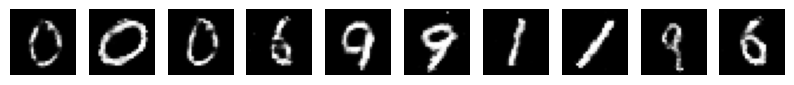

Epoch [56/100] Batch 0/937                     Loss D: 0.1671, loss G: 0.4428
Epoch [56/100] Batch 200/937                     Loss D: 0.1702, loss G: 0.4479
Epoch [56/100] Batch 400/937                     Loss D: 0.1762, loss G: 0.4600
Epoch [56/100] Batch 600/937                     Loss D: 0.2014, loss G: 0.3225
Epoch [56/100] Batch 800/937                     Loss D: 0.1794, loss G: 0.5476
Epoch [57/100] Batch 0/937                     Loss D: 0.1905, loss G: 0.3063
Epoch [57/100] Batch 200/937                     Loss D: 0.2066, loss G: 0.4272
Epoch [57/100] Batch 400/937                     Loss D: 0.1566, loss G: 0.4538
Epoch [57/100] Batch 600/937                     Loss D: 0.2117, loss G: 0.5798
Epoch [57/100] Batch 800/937                     Loss D: 0.1981, loss G: 0.4608
Epoch [58/100] Batch 0/937                     Loss D: 0.1962, loss G: 0.3282
Epoch [58/100] Batch 200/937                     Loss D: 0.1923, loss G: 0.4553
Epoch [58/100] Batch 400/937                  

KeyboardInterrupt: 

In [28]:
# Training loop 
num_epochs = 100

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):
        # Adversarial ground truths
        real = torch.ones((batch_size, 1), device=device)
        fake = torch.zeros((batch_size, 1), device=device)

        # Configure input
        images = images.to(device)
        labels = labels.to(device)

        # Train Generator
        optimizer_G.zero_grad()
        z = torch.randn(batch_size, noise_dim, device=device)
        gen_labels = torch.randint(0, num_classes, (batch_size,), device=device)
        gen_imgs = gen(z, gen_labels)
        validity = disc(gen_imgs, gen_labels)
        g_loss = criterion(validity, real)
        g_loss.backward()
        optimizer_G.step()

        # Train Discriminator
        optimizer_D.zero_grad()
        validity_real = disc(images.reshape(-1, 784), labels)
        d_real_loss = criterion(validity_real, real)

        validity_fake = disc(gen_imgs.detach(), gen_labels)
        d_fake_loss = criterion(validity_fake, fake)

        d_loss = (d_real_loss + d_fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

        if i % 200 == 0:
            print(f"Epoch [{epoch}/{num_epochs}] Batch {i}/{len(trainloader)} \
                    Loss D: {d_loss:.4f}, loss G: {g_loss:.4f}")
            
    # After every 5 epochs, generate and plot some samples
    if epoch % 5 == 0:
        z = torch.randn(10, noise_dim, device=device)
        labels = torch.randint(0, 10, (10,), device=device)
        gen_imgs = gen(z, labels).unsqueeze(1)
        gen_imgs = gen_imgs.reshape(-1, 1, 28, 28)
        gen_imgs = gen_imgs.cpu().detach().numpy()
        fig = plt.figure(figsize=(10, 10))
        for i in range(10):
            plt.subplot(1, 10, i+1)
            plt.imshow(gen_imgs[i][0], cmap='gray')
            plt.axis('off')
        plt.show()
        plt.close()

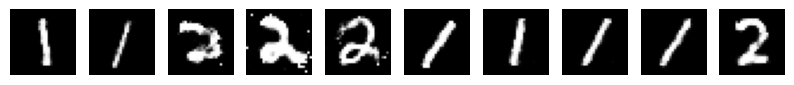

In [31]:
z = torch.randn(10, noise_dim, device=device)
labels = torch.randint(1,3, (10,), device=device)
gen_imgs = gen(z, labels).unsqueeze(1)
gen_imgs = gen_imgs.reshape(-1, 1, 28, 28)
gen_imgs = gen_imgs.cpu().detach().numpy()
fig = plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(gen_imgs[i][0], cmap='gray')
    plt.axis('off')
plt.show()
plt.close()